In [1]:
import sys
import logging
from pathlib import Path
from IPython.display import Markdown, Image


# Añadimos el directorio raíz del proyecto al path
try:
    # Para scripts .py
    current_file = Path(__file__).resolve()
    project_root = current_file.parent.parent  # Ajusta si tu estructura cambia
except NameError:
    # Para notebooks
    current_file = Path().resolve()
    project_root = current_file.parent  # Ajusta según donde esté tu notebook

# Añadir al sys.path si no está ya
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))


from src.utils.graphics import create_dashboard_from_json
from src.back.graphs import (
    BusinessLogicRetrievalGraph,
    ChunkProcessingGraph,
    ContextGeneratorGraph,
    get_conclusions_generator_graph,
    get_query_generator_graph,
    get_query_validator_graph,
    get_main_graph,
    MdlRetrievalGraph,
)

---

## Chunk Processing

In [2]:
chunk_processing_graph = ChunkProcessingGraph()
chunk_processing_graph = chunk_processing_graph.get_compiled_graph()

--- BUILDING CHUNK PROCESSING GRAPH 🏗️ ---
--- CHUNK PROCESSING GRAPH COMPILED SUCCESSFULLY ⚙️✅ ---


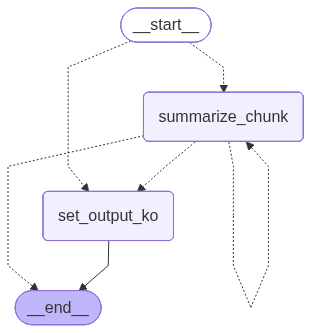

In [3]:
display(Image(chunk_processing_graph.get_graph().draw_mermaid_png()))

In [4]:
logging.basicConfig(level=logging.WARNING)

doc_txt = """
3. Métricas Clásicas del Retail y su Interpretación

Es crucial entender cómo se miden las diferentes métricas en el contexto de negocio.- Cuando se habla de productos "más vendidos", sin especificar más, generalmente nos referimos a la cantidad de unidades (`order_quantity`) vendidas. También puede ser relevante medir esto por el importe facturado (`sales_amount`) para identificar productos que, aunque se vendan en menor volumen, generan más ingresos. Pero, en este último caso se especificarán términos como "de mayor facturación".
- Cuando se refiere a clientes, tiendas/distribuidores o vendedores que "más compran/venden", esto se mide por el importe facturado (`sales_amount`) o `net sales`. Adicionalmente, se puede considerar la frecuencia de compra (para clientes y distribuidores) o el número de pedidos gestionados (para vendedores) como métricas complementarias.
- Para el análisis de rentabilidad, la métrica clave es el margen bruto (`gross margin`) o el porcentaje de margen bruto (`gross margin percentage`), lo cual permite comprender la contribución real de cada venta o producto a las ganancias, más allá del volumen o ingreso total. Este enfoque es vital para evaluar la eficiencia operativa.
- En el contexto de la gestión de promociones, el éxito no solo se mide por el discount_amount o average_discount_rate, sino también por el incremento en `order_quantity` o `sales_amount` directamente atribuible a la promoción. Es fundamental analizar la rentabilidad general del período promocional para determinar su efectividad.
- Ventas B2C (Business-to-Consumer): Estas ventas se refieren a transacciones directas con el consumidor final. En el modelo, corresponden a los pedidos donde `sale_source` es igual a `'internet_sales'`. Puede identificarse también como la unidad de negocio encargada del comercio minorista.
- Ventas B2B (Business-to-Business): Estas ventas se refieren a transacciones entre empresas, como las realizadas con distribuidores o tiendas minoristas. En el modelo, corresponden a los pedidos donde `sale_source` es igual a `'reseller_sales'`. Puede identificarse también como la unidad de negocio encargada del comercio mayorista.
"""

user_query = 'The name of the product most selled.'

test_chunk = chunk_processing_graph.invoke({
    "user_query": user_query,
    "language": 'English',
    "entity": 'business_logic',
    "chunk_txt": doc_txt, 
})

test_chunk

--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUNK 📝📚 ---
--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---
--- DECISION: GENERATION IS GROUNDED IN DOCUMENTS ✅ ---
--- DECISION: GENERATION ADDRESSES QUESTION ✅ ---


{'chunk_summary': ['Synthesized Business Logic\n\n### High-Level Summary\nThe context provides business rules and metrics related to retail sales, including definitions and interpretations of "most sold" products and other related metrics. It specifies how to measure and interpret sales data, including unit sales, revenue, and profitability.\n\n### Detailed Breakdown\n\n#### Definition of "Most Sold" Products\n- The term "most sold" generally refers to the quantity of units sold (`order_quantity`).\n- Alternatively, it can be measured by the revenue generated (`sales_amount`), which identifies products that generate higher income despite lower sales volume. This distinction is explicitly made when terms like "highest revenue" are used.\n\n#### Related Metrics and Interpretations\n- **Revenue Metrics:**\n  - `sales_amount` is used to measure the total revenue generated by sales.\n  - `net sales` can also be used for evaluating sales performance.\n- **Profitability Metrics:**\n  - `gross

---

## Business Logic

In [5]:
business_logic_graph = BusinessLogicRetrievalGraph()
business_logic_graph = business_logic_graph.get_compiled_graph()

--- BUILDING BUSINESSLOGICRETRIEVALGRAPH GRAPH 🏗️ ---
--- BUILDING CHUNK PROCESSING GRAPH 🏗️ ---
--- CHUNK PROCESSING GRAPH COMPILED SUCCESSFULLY ⚙️✅ ---
--- BUSINESSLOGICRETRIEVALGRAPH COMPILED SUCCESSFULLY ✅ ---


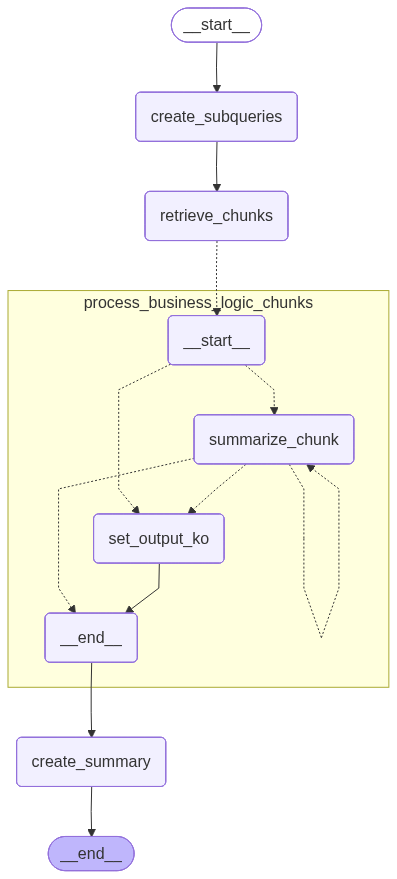

In [6]:
display(Image(business_logic_graph.get_graph(xray=1).draw_mermaid_png()))

In [7]:
logging.basicConfig(level=logging.WARNING)

user_query = 'Dime las ventas del último trimestre detallas por categorías de producto.'

business_logic_test = business_logic_graph.invoke({
    "user_query": user_query,
    'language': 'Spanish'
})['business_logic']

Markdown(business_logic_test)

--- GENERATING BUSINESS_LOGIC SUB-QUERIES 📚 ---
--- BUSINESS_LOGIC RETRIEVE TOOL 🛠️ ---
--- PARALLELIZE GENERATION 🔢 ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE: RELEVANT CHUNK ✅ ------ GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---

--- SUMMARIZE CHUNK 📝📚 ---
--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUNK 📝📚 ---
--- GRADE: NOT RELEVANT 

### Lógica de Negocio Sintetizada

#### Resumen General
El contexto proporciona reglas y ejemplos para calcular las ventas por trimestre y detallar los datos por categorías de producto. Se incluyen definiciones de períodos trimestrales, funciones SQL útiles, y ejemplos de consultas que pueden ser adaptadas para obtener las ventas del último trimestre.

#### Detalles Específicos

1. **Definición de Trimestre**:
   - Un trimestre es un período de tres meses.
   - Los trimestres en un año natural son:
     - Q1: Enero-Marzo
     - Q2: Abril-Junio
     - Q3: Julio-Septiembre
     - Q4: Octubre-Diciembre.

2. **Reglas para el cálculo de ventas por trimestre**:
   - **Ventas del trimestre pasado**:
     ```sql
     SELECT *
     FROM sales.fact_sales
     WHERE order_date BETWEEN DATE_TRUNC('quarter', CURRENT_DATE - INTERVAL '3 months') AND DATE_TRUNC('quarter', CURRENT_DATE) - INTERVAL '1 day';
     ```
   - Este cálculo utiliza el campo `order_date` de la tabla `fact_sales` para filtrar las fechas correspondientes al último trimestre.

3. **Detallado por categorías de producto**:
   - Para detallar las ventas por categorías de producto, se puede utilizar la siguiente lógica:
     ```sql
     SELECT product_key, SUM(sales_amount) AS total_sales
     FROM sales.fact_sales
     WHERE order_date BETWEEN DATE_TRUNC('quarter', CURRENT_DATE - INTERVAL '3 months') AND DATE_TRUNC('quarter', CURRENT_DATE) - INTERVAL '1 day'
     GROUP BY product_key;
     ```
   - Esto agrega las ventas (`sales_amount`) por cada categoría de producto (`product_key`) dentro del período del último trimestre.

4. **Funciones SQL útiles**:
   - `DATE_TRUNC('quarter', date)` para truncar fechas al inicio del trimestre.
   - `INTERVAL` para operaciones de resta de tiempo.
   - `SUM(sales_amount)` para calcular el total de ventas.

#### Observaciones
El contexto proporciona suficiente información para construir una consulta que calcule las ventas del último trimestre y las detalle por categorías de producto, utilizando las reglas y ejemplos proporcionados.

---

## MDL Data Schema

In [8]:
mdl_graph = MdlRetrievalGraph()
mdl_graph = mdl_graph.get_compiled_graph()

--- BUILDING MDLRETRIEVALGRAPH GRAPH 🏗️ ---
--- BUILDING CHUNK PROCESSING GRAPH 🏗️ ---
--- CHUNK PROCESSING GRAPH COMPILED SUCCESSFULLY ⚙️✅ ---
--- MDLRETRIEVALGRAPH COMPILED SUCCESSFULLY ✅ ---


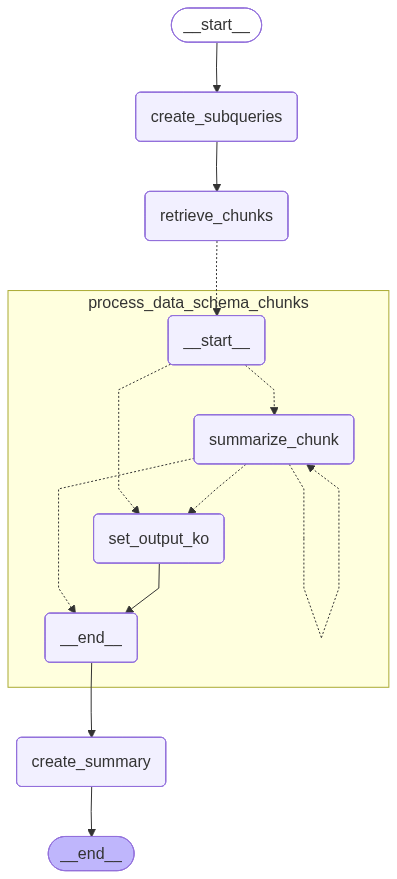

In [9]:
display(Image(mdl_graph.get_graph(xray=1).draw_mermaid_png()))

In [10]:
logging.basicConfig(level=logging.WARNING)

user_query = 'Dime las ventas del último trimestre detallas por categorías de producto.'

mdl_test = mdl_graph.invoke({
    "user_query": user_query,
    'language': 'Spanish'
})['data_schema']

Markdown(mdl_test)

--- GENERATING MDL SUB-QUERIES 📚 ---
--- MDL RETRIEVE TOOL 🛠️ ---


--- PARALLELIZE GENERATION 🔢 ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUNK 📝📚 ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRI

### Información detallada de tablas y columnas relevantes

#### Base de datos y esquema
- **Base de datos:** adventure_works_dw
- **Esquema:** sales

#### Tabla: dim_product
- **Descripción:** Contiene información detallada de cada producto vendido, incluyendo categorías y subcategorías.
- **Clave primaria:** product_key
- **Columnas relevantes:**
  - **spanish_product_category_name**: VARCHAR(50), nunca NULL. Categoría principal del producto en español.
  - **spanish_product_subcategory_name**: VARCHAR(50), nunca NULL. Subcategoría del producto en español.
  - **list_price**: NUMERIC, precio de venta en USD.
  - **start_date**: DATE, fecha de inicio de disponibilidad del producto.
  - **end_date**: DATE, fecha de fin de disponibilidad del producto, puede ser NULL.
  - **active**: BOOL, indica si el producto sigue disponible.

#### Tabla: fact_sales
- **Descripción:** Contiene detalles de las órdenes de ventas entregadas, con granularidad a nivel de línea.
- **Claves primarias:** sales_order_number, sales_order_line_number
- **Claves foráneas:**
  - product_key → sales.dim_product.product_key
- **Columnas relevantes:**
  - **order_quantity**: INT2, cantidad vendida de cada producto.
  - **sales_amount**: NUMERIC, subtotal en USD de la línea de orden de venta.
  - **order_date**: DATE, fecha de creación del pedido.
  - **product_key**: Clave foránea, relaciona con la tabla `dim_product`.

### Relaciones entre tablas
- **Condición de unión:** `fact_sales.product_key = sales.dim_product.product_key`

### Fragmentos SQL relevantes
- **Filtrar por fechas del último trimestre:** `WHERE order_date >= 'YYYY-MM-DD' AND order_date <= 'YYYY-MM-DD'`
- **Agrupar por categoría de producto:** `GROUP BY spanish_product_category_name`
- **Seleccionar columnas relevantes:** `SELECT spanish_product_category_name, SUM(sales_amount)`

---

## Global Context Generator

In [11]:
context_generator_graph = ContextGeneratorGraph()
context_generator_graph = context_generator_graph.get_compiled_graph()

--- BUILDING CONTEXT GENERATOR GRAPH 🏗️ ---
--- BUILDING BUSINESSLOGICRETRIEVALGRAPH GRAPH 🏗️ ---
--- BUILDING CHUNK PROCESSING GRAPH 🏗️ ---
--- CHUNK PROCESSING GRAPH COMPILED SUCCESSFULLY ⚙️✅ ---
--- BUSINESSLOGICRETRIEVALGRAPH COMPILED SUCCESSFULLY ✅ ---
--- BUILDING MDLRETRIEVALGRAPH GRAPH 🏗️ ---
--- BUILDING CHUNK PROCESSING GRAPH 🏗️ ---
--- CHUNK PROCESSING GRAPH COMPILED SUCCESSFULLY ⚙️✅ ---
--- MDLRETRIEVALGRAPH COMPILED SUCCESSFULLY ✅ ---
--- CONTEXT GENERATOR COMPILED SUCCESSFULLY ✅ ---


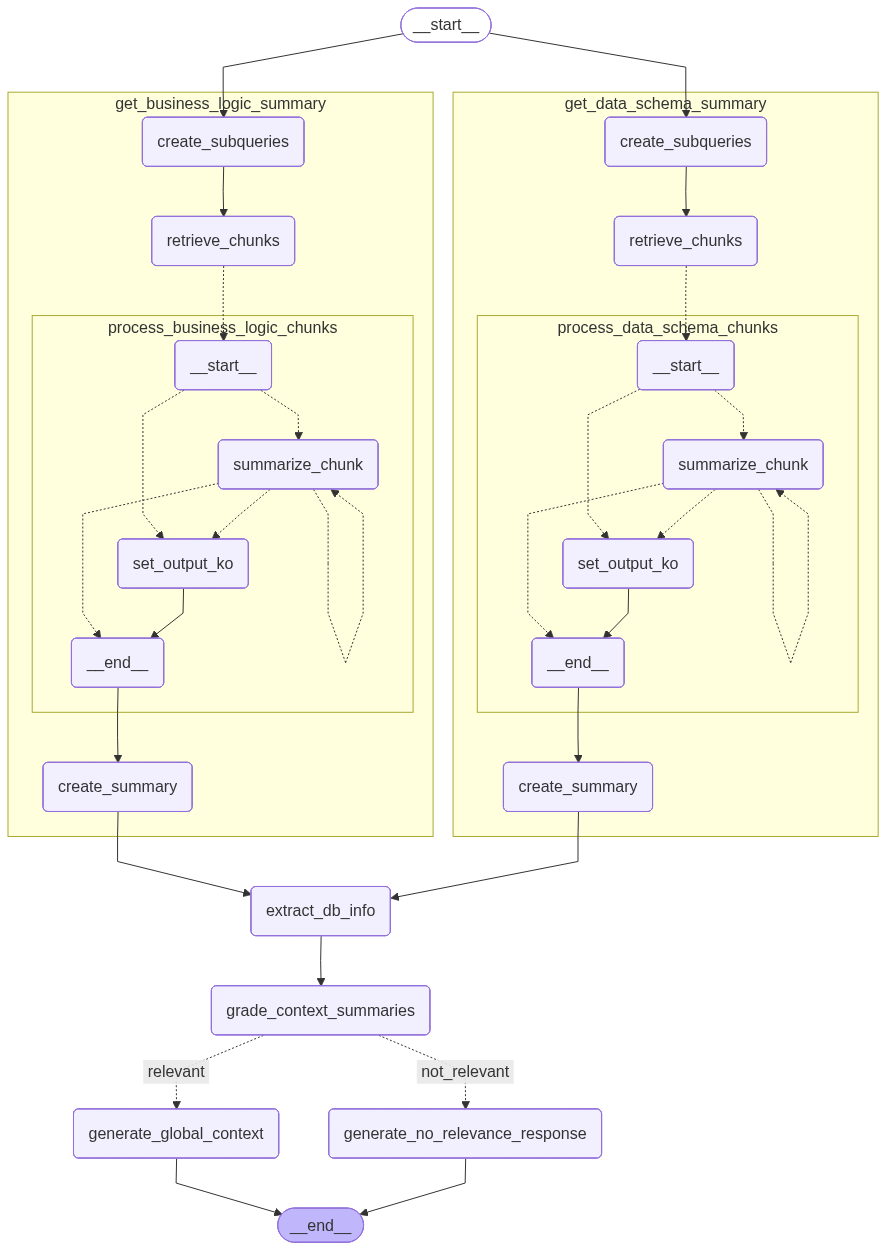

In [12]:
display(Image(context_generator_graph.get_graph(xray=3).draw_mermaid_png()))

In [14]:
user_query = 'Dime las ventas del último trimestre detallas por categorías de producto.'

global_context_test = context_generator_graph.invoke({
    "user_query": user_query,
    'language': 'Spanish'
})

global_context_test

--- GENERATING BUSINESS_LOGIC SUB-QUERIES 📚 ---
--- GENERATING MDL SUB-QUERIES 📚 ---
--- MDL RETRIEVE TOOL 🛠️ ---
--- BUSINESS_LOGIC RETRIEVE TOOL 🛠️ ---


--- PARALLELIZE GENERATION 🔢 ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUNK 📝📚 ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RE

--- DECISION: GENERATION IS GROUNDED IN DOCUMENTS ✅ ---
--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---
--- DECISION: GENERATION ADDRESSES QUESTION ✅ ---
--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---
--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---
--- DECISION: GENERATION IS GROUNDED IN DOCUMENTS ✅ ---
--- DECISION: GENERATION IS GROUNDED IN DOCUMENTS ✅ ---
--- DECISION: GENERATION ADDRESSES QUESTION ✅ ---
--- DECISION: GENERATION ADDRESSES QUESTION ✅ ---
--- DECISION: GENERATION IS GROUNDED IN DOCUMENTS ✅ ---
--- DECISION: GENERATION ADDRESSES QUESTION ✅ ---
--- SUMMARIZE BUSINES LOGIC 📝👨‍💼 ---


--- PARALLELIZE GENERATION 🔢 ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ------ GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---

--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUNK 📝📚 ---
--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUNK 📝📚 ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT 

{'language': 'Spanish',
 'db_name': 'adventure_works_dw',
 'schema_name': 'sales',
 'relevant_context': True,
 'context': "### Resumen General\nEl objetivo es calcular las ventas del último trimestre desglosadas por categorías de producto. Esto implica utilizar las tablas `fact_sales` y `dim_product` del esquema `sales` en la base de datos `adventure_works_dw`. La tabla `fact_sales` contiene los datos de ventas, mientras que la tabla `dim_product` proporciona información categórica de los productos.\n\n### Esquema Detallado y Relaciones\n#### Tabla: `fact_sales`\n- **Base de datos:** adventure_works_dw\n- **Esquema:** sales\n- **Descripción:** Contiene detalles de las órdenes de ventas realizadas.\n- **Columnas relevantes:**\n  - `order_date` (DATE, NOT NULL): Fecha de la orden de venta, utilizada para filtrar las ventas del último trimestre.\n  - `product_key` (INT, NOT NULL): Clave foránea que se relaciona con `dim_product.product_key`.\n  - `sales_amount` (NUMERIC, NOT NULL): Monto 

In [15]:
Markdown(global_context_test['context'])

### Resumen General
El objetivo es calcular las ventas del último trimestre desglosadas por categorías de producto. Esto implica utilizar las tablas `fact_sales` y `dim_product` del esquema `sales` en la base de datos `adventure_works_dw`. La tabla `fact_sales` contiene los datos de ventas, mientras que la tabla `dim_product` proporciona información categórica de los productos.

### Esquema Detallado y Relaciones
#### Tabla: `fact_sales`
- **Base de datos:** adventure_works_dw
- **Esquema:** sales
- **Descripción:** Contiene detalles de las órdenes de ventas realizadas.
- **Columnas relevantes:**
  - `order_date` (DATE, NOT NULL): Fecha de la orden de venta, utilizada para filtrar las ventas del último trimestre.
  - `product_key` (INT, NOT NULL): Clave foránea que se relaciona con `dim_product.product_key`.
  - `sales_amount` (NUMERIC, NOT NULL): Monto total de la venta, utilizado para calcular el total de ventas por categoría.

#### Tabla: `dim_product`
- **Base de datos:** adventure_works_dw
- **Esquema:** sales
- **Descripción:** Contiene información detallada de cada producto, incluyendo categorías y subcategorías en español.
- **Columnas relevantes:**
  - `product_key` (INT, NOT NULL): Clave primaria que se relaciona con `fact_sales.product_key`.
  - `spanish_product_category_name` (VARCHAR(50), NOT NULL): Nombre de la categoría del producto en español.
  - `spanish_product_subcategory_name` (VARCHAR(50), NOT NULL): Nombre de la subcategoría del producto en español.

#### Relaciones entre tablas
- La columna `product_key` en `fact_sales` se relaciona con `dim_product.product_key` para obtener información categórica de los productos.

### Reglas de Negocio y Lógica
1. **Definición del Último Trimestre:**
   - El último trimestre se define como el período de tres meses inmediatamente anterior al trimestre actual.
   - Para calcular este período, se utiliza la lógica temporal:
     ```sql
     DATE_TRUNC('quarter', CURRENT_DATE - INTERVAL '3 months') AS inicio_trimestre,
     DATE_TRUNC('quarter', CURRENT_DATE) - INTERVAL '1 day' AS fin_trimestre
     ```

2. **Filtrado por Fecha:**
   - Utilizar el campo `order_date` de la tabla `fact_sales` para filtrar las ventas dentro del período del último trimestre.

3. **Desglose por Categorías de Producto:**
   - Realizar una agregación de las ventas utilizando `SUM(sales_amount)` para calcular el total de ventas por categoría.
   - Relacionar la columna `product_key` de `fact_sales` con `dim_product.product_key` para obtener los nombres de las categorías y subcategorías.

4. **Ejemplo de Consulta SQL:**
   - La consulta para obtener las ventas del último trimestre detalladas por categorías de producto es:
     ```sql
     SELECT dp.spanish_product_category_name, dp.spanish_product_subcategory_name, SUM(fs.sales_amount) AS total_sales
     FROM sales.fact_sales fs
     JOIN sales.dim_product dp ON fs.product_key = dp.product_key
     WHERE fs.order_date BETWEEN DATE_TRUNC('quarter', CURRENT_DATE - INTERVAL '3 months') AND DATE_TRUNC('quarter', CURRENT_DATE) - INTERVAL '1 day'
     GROUP BY dp.spanish_product_category_name, dp.spanish_product_subcategory_name;
     ```

In [17]:
user_query = 'Dime los 10 clientes que más han comprado el mes pasado.'

global_context_test = context_generator_graph.invoke({
    "user_query": user_query,
    "language": 'Spanish'
})

global_context_test

--- GENERATING BUSINESS_LOGIC SUB-QUERIES 📚 ---
--- GENERATING MDL SUB-QUERIES 📚 ---
--- BUSINESS_LOGIC RETRIEVE TOOL 🛠️ ---
--- MDL RETRIEVE TOOL 🛠️ ---
--- PARALLELIZE GENERATION 🔢 ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---

--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUNK 📝📚 ---
--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---
--- DECISION: GENERATION IS GROUNDED IN DOCUMENTS ✅ ---
--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---
--- DECISION: GENERATION IS NOT GROUNDED (HALLUCINATIONS) 👻❌ ---
--- SUMMARIZE CHUNK 📝📚 ---
--- DECISION: GENERATION ADDRESSES QUESTION ✅ ---
--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---


--- DECISION: GENERATION IS GROUNDED IN DOCUMENTS ✅ ---
--- DECISION: GENERATION ADDRESSES QUESTION ✅ ---
--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---


--- DECISION: GENERATION IS GROUNDED IN DOCUMENTS ✅ ---
--- DECISION: GENERATION ADDRESSES QUESTION ✅ ---
--- SUMMARIZE BUSINES LOGIC 📝👨‍💼 ---


--- PARALLELIZE GENERATION 🔢 ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUNK 📝📚 ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUN

{'language': 'Spanish',
 'db_name': 'adventure_works_dw',
 'schema_name': 'sales',
 'relevant_context': True,
 'context': '### Resumen General\nLa consulta busca identificar los 10 clientes que más han comprado durante el mes pasado. Para ello, se utiliza la tabla `fact_sales` para obtener las transacciones de ventas y la tabla `dim_customer` para los datos de los clientes. El volumen de ventas se calcula como la suma del campo `sales_amount` agrupado por `customer_key`, y se filtran las transacciones realizadas en el mes anterior.\n\n### Esquema Detallado y Relaciones\n#### Base de datos y esquema\n- **Base de datos:** adventure_works_dw\n- **Esquema:** sales\n\n#### Tabla: dim_customer\n- **Descripción:** Contiene información demográfica y de ingresos de los clientes.\n- **Clave primaria:** customer_key\n- **Columnas relevantes:**\n  - **customer_full_name**: Tipo de dato TEXT, nombre completo del cliente.\n\n#### Tabla: fact_sales\n- **Descripción:** Registra detalles de órdenes de 

In [18]:
Markdown(global_context_test['context'])

### Resumen General
La consulta busca identificar los 10 clientes que más han comprado durante el mes pasado. Para ello, se utiliza la tabla `fact_sales` para obtener las transacciones de ventas y la tabla `dim_customer` para los datos de los clientes. El volumen de ventas se calcula como la suma del campo `sales_amount` agrupado por `customer_key`, y se filtran las transacciones realizadas en el mes anterior.

### Esquema Detallado y Relaciones
#### Base de datos y esquema
- **Base de datos:** adventure_works_dw
- **Esquema:** sales

#### Tabla: dim_customer
- **Descripción:** Contiene información demográfica y de ingresos de los clientes.
- **Clave primaria:** customer_key
- **Columnas relevantes:**
  - **customer_full_name**: Tipo de dato TEXT, nombre completo del cliente.

#### Tabla: fact_sales
- **Descripción:** Registra detalles de órdenes de ventas con granularidad a nivel de línea.
- **Claves primarias:** sales_order_number, sales_order_line_number
- **Columnas relevantes:**
  - **order_date**: Tipo de dato DATE, fecha de creación del pedido.
  - **sales_amount**: Tipo de dato NUMERIC, subtotal en USD de la línea de orden de venta.
  - **customer_key**: Referencia a `dim_customer.customer_key`, identificador del cliente asociado.

#### Relación entre tablas
- **Condición de unión:** `fact_sales.customer_key = dim_customer.customer_key`

### Reglas de Negocio y Lógica
1. **Cálculo del Volumen de Ventas por Cliente:**
   - Se utiliza la función de agregación `SUM` sobre la columna `sales_amount` agrupada por `customer_key`.

2. **Filtro Temporal:**
   - Para limitar las transacciones al mes pasado, se utiliza la columna `order_date` con una condición en el `WHERE` que filtra las fechas entre el primer y último día del mes anterior. Ejemplo:
     ```sql
     WHERE order_date BETWEEN DATEADD(MONTH, -1, DATEFROMPARTS(YEAR(GETDATE()), MONTH(GETDATE()), 1)) AND DATEADD(DAY, -1, DATEFROMPARTS(YEAR(GETDATE()), MONTH(GETDATE()), 1))
     ```

3. **Orden y Limitación de Resultados:**
   - Los resultados se ordenan en orden descendente por el volumen de ventas calculado y se limita la salida a los 10 primeros clientes utilizando `ORDER BY` y `LIMIT 10`.

4. **Ejemplo de Consulta SQL:**
   ```sql
   SELECT
       fs.customer_key,
       dc.customer_full_name AS cliente,
       SUM(fs.sales_amount) AS importe_ventas_por_cliente
   FROM sales.fact_sales fs
   JOIN sales.dim_customer dc ON fs.customer_key = dc.customer_key
   WHERE fs.order_date BETWEEN DATEADD(MONTH, -1, DATEFROMPARTS(YEAR(GETDATE()), MONTH(GETDATE()), 1)) AND DATEADD(DAY, -1, DATEFROMPARTS(YEAR(GETDATE()), MONTH(GETDATE()), 1))
   GROUP BY fs.customer_key, dc.customer_full_name
   ORDER BY importe_ventas_por_cliente DESC
   LIMIT 10;
   ```

In [19]:
user_query = 'Dime el departamento con el salario medio más alto.'

global_context_test = context_generator_graph.invoke({
    "user_query": user_query,
    "language": 'Spanish'
})

global_context_test

--- GENERATING BUSINESS_LOGIC SUB-QUERIES 📚 ---
--- GENERATING MDL SUB-QUERIES 📚 ---
--- MDL RETRIEVE TOOL 🛠️ ---
--- BUSINESS_LOGIC RETRIEVE TOOL 🛠️ ---
--- PARALLELIZE GENERATION 🔢 ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTP

--- PARALLELIZE GENERATION 🔢 ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️

{'language': 'Spanish',
 'db_name': '[Not Found]',
 'schema_name': '[Not Found]',
 'relevant_context': False,
 'no_relevant_context_msg': 'Lo siento mucho, pero no puedo responder a tu pregunta sobre el departamento con el salario medio más alto, ya que este tema está fuera del alcance de la información proporcionada. Sin embargo, puedo ayudarte con temas relacionados con el análisis de ventas, como el cálculo del volumen de ventas por agente comercial o el valor promedio por orden. Por favor, dime cómo puedo asistirte.'}

In [20]:
Markdown(global_context_test['no_relevant_context_msg'])

Lo siento mucho, pero no puedo responder a tu pregunta sobre el departamento con el salario medio más alto, ya que este tema está fuera del alcance de la información proporcionada. Sin embargo, puedo ayudarte con temas relacionados con el análisis de ventas, como el cálculo del volumen de ventas por agente comercial o el valor promedio por orden. Por favor, dime cómo puedo asistirte.

---

## Query Generator

In [21]:
query_generator_graph = get_query_generator_graph()

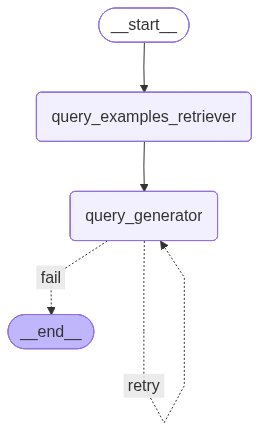

In [22]:
Image(query_generator_graph.get_graph().draw_mermaid_png())

In [23]:
logging.basicConfig(level=logging.WARNING)

query_generator_graph.invoke({
    "context": "Tablas:\n  customers(id, name, country)\n",
    "user_query": "Muéstrame los 10 productos más vendidos para el B2B en el último trimestre, excluyendo los Accesorios. Mes a mes indica cuántas unidades se vendieron, y muestra también a qué categoría y subcategoría pertenecen",
    "language": "Spanish"
})

---QUERY EXAMPLES RETRIEVE TOOL---


{'sql_query': "WITH \nlast_quarter AS (\n  SELECT\n    fs.product_key,\n    COALESCE(dp.spanish_product_name, dp.english_product_name) AS product_name,\n    dp.spanish_product_category_name,\n    dp.spanish_product_subcategory_name,\n    EXTRACT(MONTH FROM fs.order_date) AS month_in_quarter,\n    fs.order_quantity\n  FROM\n    sales.fact_sales fs\n    JOIN sales.dim_product dp ON fs.product_key = dp.product_key\n  WHERE\n    fs.sale_source = 'reseller_sales'\n    AND dp.spanish_product_category_name <> 'Accesorio'\n    AND fs.order_date >= date_trunc('quarter', CURRENT_DATE - interval '3 months')\n    AND fs.order_date < date_trunc('quarter', CURRENT_DATE)\n),\ntop_products AS (\n  SELECT\n    product_key,\n    product_name,\n    spanish_product_category_name,\n    spanish_product_subcategory_name,\n    SUM(order_quantity) AS total_qty\n  FROM\n    last_quarter\n  GROUP BY\n    product_key, product_name, spanish_product_category_name, spanish_product_subcategory_name\n  ORDER BY\n    t

---

## Query Validator

In [2]:
query_validator_graph = get_query_validator_graph()

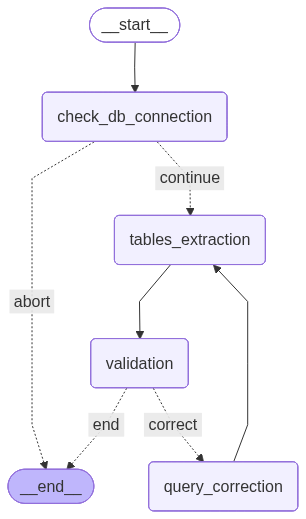

In [3]:
Image(query_validator_graph.get_graph().draw_mermaid_png())

#### Ejemplo 1

In [4]:
logging.basicConfig(level=logging.WARNING)

user_query = 'Muéstrame los 10 productos más vendidos para el B2B en el último trimestre, excluyendo los Accesorios. Mes a mes indica cuántas unidades se vendieron, y muestra también a qué categoría y subcategoría pertenecen'
sql_query = "WITH \nlast_quarter AS (\n  SELECT\n    fs.product_key,\n    COALESCE(dp.spanish_product_name, dp.english_product_name) AS product_name,\n    dp.spanish_product_category_name,\n    dp.spanish_product_subcategory_name,\n    EXTRACT(MONTH FROM fs.order_date) AS month_in_quarter,\n    fs.order_quantity\n  FROM\n    sales.ventas fs\n    JOIN sales.productos dp ON fs.product_key = dp.product_key\n  WHERE\n    fs.sale_source = 'reseller_sales'\n    AND dp.spanish_product_category_name <> 'Accesorio'\n    AND fs.order_date >= date_trunc('quarter', CURRENT_DATE - interval '3 months')\n    AND fs.order_date < date_trunc('quarter', CURRENT_DATE)\n),\ntop_products AS (\n  SELECT\n    product_key,\n    product_name,\n    spanish_product_category_name,\n    spanish_product_subcategory_name,\n    SUM(order_quantity) AS total_qty\n  FROM\n    last_quarter\n  GROUP BY\n    product_key, product_name, spanish_product_category_name, spanish_product_subcategory_name\n  ORDER BY\n    total_qty DESC\n  LIMIT 10\n)\nSELECT\n  tp.product_name AS producto,\n  tp.spanish_product_category_name AS categoria,\n  tp.spanish_product_subcategory_name AS subcategoria,\n  SUM(lq.order_quantity) FILTER (WHERE lq.month_in_quarter = EXTRACT(MONTH FROM date_trunc('quarter', CURRENT_DATE - interval '3 months'))) AS primer_mes,\n  SUM(lq.order_quantity) FILTER (WHERE lq.month_in_quarter = EXTRACT(MONTH FROM date_trunc('quarter', CURRENT_DATE - interval '3 months') + interval '1 month')) AS segundo_mes,\n  SUM(lq.order_quantity) FILTER (WHERE lq.month_in_quarter = EXTRACT(MONTH FROM date_trunc('quarter', CURRENT_DATE - interval '3 months') + interval '2 month')) AS tercer_mes,\n  SUM(lq.order_quantity) AS total\nFROM\n  top_products tp\n  LEFT JOIN last_quarter lq ON tp.product_key = lq.product_key\nGROUP BY\n  producto, categoria, subcategoria\nORDER BY\n  total DESC"
context = "### Resumen General\nEl objetivo de la consulta es identificar los 10 productos más vendidos en el modelo de negocio B2B durante el último trimestre, excluyendo aquellos clasificados como accesorios. Además, se requiere un desglose mensual de las unidades vendidas y la inclusión de información sobre la categoría y subcategoría de cada producto.\n\n### Esquema Detallado y Relaciones\n#### Base de datos y esquema\n- **Base de datos:** adventure_works_dw\n- **Esquema:** sales\n\n#### Tabla: dim_product\n- **Descripción:** Contiene información detallada de los productos vendidos.\n- **Clave primaria:** product_key\n- **Columnas relevantes:**\n  - **english_product_category_name**: VARCHAR(50), nunca NULL.\n  - **spanish_product_category_name**: VARCHAR(50), nunca NULL.\n  - **english_product_subcategory_name**: VARCHAR(50), nunca NULL.\n  - **spanish_product_subcategory_name**: VARCHAR(50), nunca NULL.\n  - **spanish_product_name**: VARCHAR(50), puede ser NULL.\n  - **english_product_name**: VARCHAR(50), nunca NULL.\n  - **finished_goods_flag**: BOOL.\n  - **start_date**: DATE.\n  - **end_date**: DATE, puede ser NULL.\n  - **dealer_price**: NUMERIC.\n  - **list_price**: NUMERIC.\n\n#### Tabla: fact_sales\n- **Descripción:** Contiene detalles de las órdenes de ventas realizadas.\n- **Clave primaria:** sales_order_number, sales_order_line_number\n- **Claves foráneas:**\n  - product_key → sales.dim_product.product_key\n- **Columnas relevantes:**\n  - **order_quantity**: INT2.\n  - **sale_source**: TEXT.\n  - **order_date**: DATE.\n  - **product_key**: Referencia a sales.dim_product.product_key.\n\n#### Relaciones entre tablas\n- Para unir las tablas **fact_sales** y **dim_product**, se utiliza la clave foránea **product_key**.\n- Condiciones de unión: `fact_sales.product_key = dim_product.product_key`.\n\n### Reglas de Negocio y Lógica\n1. **Modelo de Negocio B2B:**\n   - Las ventas B2B se identifican con el campo `sale_source` igual a `'reseller_sales'`.\n\n2. **Productos Más Vendidos:**\n   - Se define por la cantidad de unidades vendidas (`order_quantity`).\n   - Implementación SQL:\n     ```sql\n     SUM(order_quantity) AS cantidad_vendida\n     ```\n\n3. **Exclusión de Accesorios:**\n   - Se aplica el filtro `spanish_product_category_name != 'Accesorio'`.\n\n4. **Desglose Temporal:**\n   - Para calcular el último trimestre, se utiliza el campo `order_date` en la tabla `fact_sales`.\n   - Ejemplo de filtro SQL para el último trimestre:\n     ```sql\n     WHERE order_date BETWEEN DATE_TRUNC('quarter', CURRENT_DATE - INTERVAL '3 months') AND DATE_TRUNC('quarter', CURRENT_DATE) - INTERVAL '1 day';\n     ```\n   - Para el desglose mensual, se puede usar la función `EXTRACT(MONTH FROM order_date)`.\n\n5. **Categorías y Subcategorías:**\n   - Para mostrar nombres de categorías y subcategorías, se priorizan los campos en español (`spanish_product_category_name`, `spanish_product_subcategory_name`). Si son nulos, se utiliza la versión en inglés como alternativa.\n   - Ejemplo de lógica SQL:\n     ```sql\n     SELECT\n         COALESCE(spanish_product_category_name, english_product_category_name) AS producto_categoria,\n         COALESCE(spanish_product_subcategory_name, english_product_subcategory_name) AS producto_subcategoria\n     FROM sales.dim_product;\n     ```"

results = query_validator_graph.invoke({
    "user_query": user_query, 
    "sql_query": sql_query, 
    "context": context,
    "db_name": "adventure_works_dw",
    "schema_name": "sales"
})

results


--- INICIANDO COMPROBACIÓN DE CONEXIÓN A BBDD ⚙️ ---
✅ Conexión a la base de datos establecida correctamente.

--- INICIANDO FASE DE EXTRACCIÓN DE TABLAS CON LLM 🧮 ---
Tablas detectadas por el LLM: ['ventas', 'productos']

--- INICIANDO FASE DE JUEZ DE COHERENCIA 👩‍⚖️ ---

Veredicto del juez: COHERENTE ✅

--- PASANDO A FASE DE EJECUCIÓN EN POSTGRESQL ---


❌ Error de PostgreSQL detectado: table_names {'ventas'} not found in database

--- INICIANDO FASE DE CORRECIÓN 📝 ---

✅  > Query corregida recibida: WITH 
last_quarter AS (
  SELECT
    fs.product_key,
    COALESCE(dp.s...

--- INICIANDO FASE DE EXTRACCIÓN DE TABLAS CON LLM 🧮 ---
Tablas detectadas por el LLM: ['fact_sales', 'dim_product']

--- INICIANDO FASE DE JUEZ DE COHERENCIA 👩‍⚖️ ---

Veredicto del juez: COHERENTE ✅

--- PASANDO A FASE DE EJECUCIÓN EN POSTGRESQL ---


✅ Query ejecutada correctamente.


{'sql_query': "WITH \nlast_quarter AS (\n  SELECT\n    fs.product_key,\n    COALESCE(dp.spanish_product_name, dp.english_product_name) AS product_name,\n    dp.spanish_product_category_name,\n    dp.spanish_product_subcategory_name,\n    EXTRACT(MONTH FROM fs.order_date) AS month_in_quarter,\n    fs.order_quantity\n  FROM\n    sales.fact_sales fs\n    JOIN sales.dim_product dp ON fs.product_key = dp.product_key\n  WHERE\n    fs.sale_source = 'reseller_sales'\n    AND dp.spanish_product_category_name <> 'Accesorio'\n    AND fs.order_date >= date_trunc('quarter', CURRENT_DATE - interval '3 months')\n    AND fs.order_date < date_trunc('quarter', CURRENT_DATE)\n),\ntop_products AS (\n  SELECT\n    product_key,\n    product_name,\n    spanish_product_category_name,\n    spanish_product_subcategory_name,\n    SUM(order_quantity) AS total_qty\n  FROM\n    last_quarter\n  GROUP BY\n    product_key, product_name, spanish_product_category_name, spanish_product_subcategory_name\n  ORDER BY\n    t

#### Ejemplo 2

In [5]:
user_msg_ko_coherencia = "Quiero ver los nombres de los clientes.(solo 10)"
query_ko_coherencia = "SELECT sales_amount FROM sales.fact_sales limit 10" # Coherente sintácticamente, incoherente semánticamente
high_level_summary = "###Detalle de Tablas y Columnas Relevantes\n#### Tabla: dim_customer\n- *Descripción:* Contiene información detallada de clientes.\n- *Columnas Relevantes:\n  - customer_key: Clave primaria, tipo NUMERIC.\n  - customer_full_name: Nombre y apellido del cliente, tipo TEXT.n\n#### Tabla: fact_sales\n- **Descripción:* Contiene detalles de las órdenes de ventas.\n- *Columnas Relevantes:*\n  - customer_key: Llave foránea, tipo NUMERIC.\n  - sales_amount: Subtotal de la línea de orden de venta, tipo NUMERIC.\n  - order_date: Fecha de creación del pedido, tipo DATE.\n"

results = query_validator_graph.invoke({
    "user_query": user_msg_ko_coherencia, 
    "sql_query": query_ko_coherencia, 
    "context": high_level_summary,
    "db_name": "adventure_works_dw",
    "schema_name": "sales"
})

results


--- INICIANDO COMPROBACIÓN DE CONEXIÓN A BBDD ⚙️ ---
✅ Conexión a la base de datos establecida correctamente.

--- INICIANDO FASE DE EXTRACCIÓN DE TABLAS CON LLM 🧮 ---
Tablas detectadas por el LLM: ['fact_sales']

--- INICIANDO FASE DE JUEZ DE COHERENCIA 👩‍⚖️ ---

Veredicto del juez: INCOHERENTE ❌

❌ La query es incoherente. No se ejecutará en la BBDD.

--- INICIANDO FASE DE CORRECIÓN 📝 ---

✅  > Query corregida recibida: SELECT customer_full_name FROM sales.dim_customer LIMIT 10...

--- INICIANDO FASE DE EXTRACCIÓN DE TABLAS CON LLM 🧮 ---
Tablas detectadas por el LLM: ['dim_customer']

--- INICIANDO FASE DE JUEZ DE COHERENCIA 👩‍⚖️ ---

Veredicto del juez: COHERENTE ✅

--- PASANDO A FASE DE EJECUCIÓN EN POSTGRESQL ---


✅ Query ejecutada correctamente.


{'sql_query': 'SELECT customer_full_name FROM sales.dim_customer LIMIT 10',
 'table_names': ['dim_customer'],
 'tables_info': ['\nCREATE TABLE dim_customer (\n\tcustomer_key INTEGER NOT NULL, \n\tgeography_key INTEGER, \n\tcustomer_full_name TEXT, \n\tbirth_date DATE, \n\tmarital_status CHAR(1), \n\tgender VARCHAR(1), \n\tyearly_income NUMERIC(19, 4), \n\ttotal_children SMALLINT, \n\tnumber_children_at_home SMALLINT, \n\tenglish_education VARCHAR(40), \n\tspanish_education VARCHAR(40), \n\tenglish_occupation VARCHAR(100), \n\tspanish_occupation VARCHAR(100), \n\thouse_owner BOOLEAN, \n\tnumber_cars_owned SMALLINT, \n\tcommute_distance VARCHAR(15), \n\tCONSTRAINT dim_customer_pkey PRIMARY KEY (customer_key), \n\tCONSTRAINT fk_dim_customer_geography FOREIGN KEY(geography_key) REFERENCES dim_geography (geography_key)\n)\n\n/*\n3 rows from dim_customer table:\ncustomer_key\tgeography_key\tcustomer_full_name\tbirth_date\tmarital_status\tgender\tyearly_income\ttotal_children\tnumber_children

#### Ejemplo 3

In [6]:
user_msg_ko_db = "Quiero saber el total de clientes por genero."
query_ko_db = "SELECT gender, COUNT(*) AS total_clients FROM sales.dimen_customer GROUP BY gender" # Nombre de tabla incorrecto
high_level_summary = "###Detalle de Tablas y Columnas Relevantes\n#### Tabla: dim_customer\n- *Descripción:* Contiene información detallada de clientes.\n- *Columnas Relevantes:\n  - customer_key: Clave primaria, tipo NUMERIC.\n  - gender: genero del cliente, tipo TEXT.\n\n#### Tabla: fact_sales\n- **Descripción:* Contiene detalles de las órdenes de ventas.\n- *Columnas Relevantes:*\n  - customer_key: Llave foránea, tipo NUMERIC.\n  - sales_amount: Subtotal de la línea de orden de venta, tipo NUMERIC.\n  - order_date: Fecha de creación del pedido, tipo DATE.\n"

results = query_validator_graph.invoke({
    "user_query": user_msg_ko_db, 
    "sql_query": query_ko_db, 
    "context": high_level_summary,
    "db_name": "adventure_works_dw",
    "schema_name": "sales"
})

results


--- INICIANDO COMPROBACIÓN DE CONEXIÓN A BBDD ⚙️ ---
✅ Conexión a la base de datos establecida correctamente.

--- INICIANDO FASE DE EXTRACCIÓN DE TABLAS CON LLM 🧮 ---
Tablas detectadas por el LLM: ['dimen_customer']

--- INICIANDO FASE DE JUEZ DE COHERENCIA 👩‍⚖️ ---

Veredicto del juez: COHERENTE ✅

--- PASANDO A FASE DE EJECUCIÓN EN POSTGRESQL ---


❌ Error de PostgreSQL detectado: table_names {'dimen_customer'} not found in database

--- INICIANDO FASE DE CORRECIÓN 📝 ---

✅  > Query corregida recibida: SELECT dim_customer.gender, COUNT(*) AS total_clients FROM sales.dim_c...

--- INICIANDO FASE DE EXTRACCIÓN DE TABLAS CON LLM 🧮 ---
Tablas detectadas por el LLM: ['dim_customer']

--- INICIANDO FASE DE JUEZ DE COHERENCIA 👩‍⚖️ ---

Veredicto del juez: INCOHERENTE ❌

❌ La query es incoherente. No se ejecutará en la BBDD.

--- INICIANDO FASE DE CORRECIÓN 📝 ---

✅  > Query corregida recibida: SELECT sales.dim_customer.gender, COUNT(*) AS total_clients FROM sales...

--- INICIANDO FASE DE

{'sql_query': 'SELECT sales.dim_customer.gender, COUNT(*) AS total_clients FROM sales.dim_customer GROUP BY sales.dim_customer.gender;',
 'table_names': ['dim_customer'],
 'tables_info': ['\nCREATE TABLE dim_customer (\n\tcustomer_key INTEGER NOT NULL, \n\tgeography_key INTEGER, \n\tcustomer_full_name TEXT, \n\tbirth_date DATE, \n\tmarital_status CHAR(1), \n\tgender VARCHAR(1), \n\tyearly_income NUMERIC(19, 4), \n\ttotal_children SMALLINT, \n\tnumber_children_at_home SMALLINT, \n\tenglish_education VARCHAR(40), \n\tspanish_education VARCHAR(40), \n\tenglish_occupation VARCHAR(100), \n\tspanish_occupation VARCHAR(100), \n\thouse_owner BOOLEAN, \n\tnumber_cars_owned SMALLINT, \n\tcommute_distance VARCHAR(15), \n\tCONSTRAINT dim_customer_pkey PRIMARY KEY (customer_key), \n\tCONSTRAINT fk_dim_customer_geography FOREIGN KEY(geography_key) REFERENCES dim_geography (geography_key)\n)\n\n/*\n3 rows from dim_customer table:\ncustomer_key\tgeography_key\tcustomer_full_name\tbirth_date\tmarital_s

---

## Conclusions Generator

In [27]:
conclusions_generator_graph = get_conclusions_generator_graph()

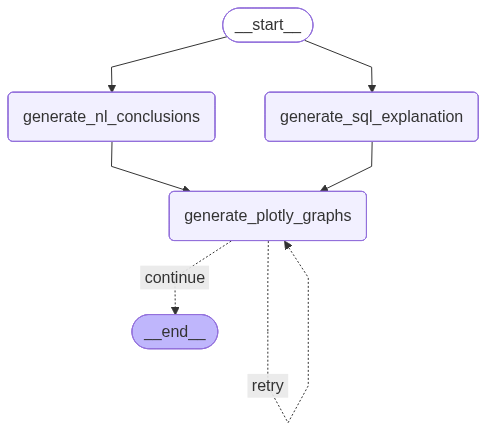

In [28]:
Image(conclusions_generator_graph.get_graph().draw_mermaid_png())

In [29]:
logging.basicConfig(level=logging.WARNING)

user_query = 'Muéstrame los 10 productos más vendidos para el B2B en el último trimestre, excluyendo los Accesorios. Mes a mes indica cuántas unidades se vendieron, y muestra también a qué categoría y subcategoría pertenecen'

query_results = [{'producto': 'Camiseta clásica, P', 'categoria': 'Prenda', 'subcategoria': 'Camiseta', 'primer_mes': 381, 'segundo_mes': 380, 'tercer_mes': 190, 'total': 951},
  {'producto': 'Jersey clásico de manga corta, SG', 'categoria': 'Prenda', 'subcategoria': 'Jersey', 'primer_mes': 329, 'segundo_mes': 299, 'tercer_mes': 183, 'total': 811},
  {'producto': "Women's Mountain Shorts, S", 'categoria': 'Prenda', 'subcategoria': 'Pantalones cortos', 'primer_mes': 295, 'segundo_mes': 258, 'tercer_mes': 141, 'total': 694},
  {'producto': 'Jersey con logotipo de manga larga, G', 'categoria': 'Prenda', 'subcategoria': 'Jersey', 'primer_mes': 312, 'segundo_mes': 243, 'tercer_mes': 129, 'total': 684},
  {'producto': 'AWC Logo Cap', 'categoria': 'Prenda', 'subcategoria': 'Gorra', 'primer_mes': 291, 'segundo_mes': 243, 'tercer_mes': 121, 'total': 655},
  {'producto': "Women's Mountain Shorts, L", 'categoria': 'Prenda', 'subcategoria': 'Pantalones cortos', 'primer_mes': 262, 'segundo_mes': 236, 'tercer_mes': 120, 'total': 618},
  {'producto': 'Jersey clásico de manga corta, G', 'categoria': 'Prenda', 'subcategoria': 'Jersey', 'primer_mes': 217, 'segundo_mes': 231, 'tercer_mes': 113, 'total': 561},
  {'producto': 'Calcetines para carreras, G', 'categoria': 'Prenda', 'subcategoria': 'Calcetines', 'primer_mes': 231, 'segundo_mes': 179, 'tercer_mes': 93, 'total': 503},
  {'producto': 'Camiseta clásica, M', 'categoria': 'Prenda', 'subcategoria': 'Camiseta', 'primer_mes': 197, 'segundo_mes': 187, 'tercer_mes': 85, 'total': 469},
  {'producto': 'Half-Finger Gloves, M', 'categoria': 'Prenda', 'subcategoria': 'Guantes', 'primer_mes': 187, 'segundo_mes': 168, 'tercer_mes': 82, 'total': 437}]

sql_query = "WITH \nlast_quarter AS (\n  SELECT\n    fs.product_key,\n    COALESCE(dp.spanish_product_name, dp.english_product_name) AS product_name,\n    dp.spanish_product_category_name,\n    dp.spanish_product_subcategory_name,\n    EXTRACT(MONTH FROM fs.order_date) AS month_in_quarter,\n    fs.order_quantity\n  FROM\n    sales.fact_sales fs\n    JOIN sales.dim_product dp ON fs.product_key = dp.product_key\n  WHERE\n    fs.sale_source = 'reseller_sales'\n    AND dp.spanish_product_category_name <> 'Accesorio'\n    AND fs.order_date >= date_trunc('quarter', CURRENT_DATE - interval '3 months')\n    AND fs.order_date < date_trunc('quarter', CURRENT_DATE)\n),\ntop_products AS (\n  SELECT\n    product_key,\n    product_name,\n    spanish_product_category_name,\n    spanish_product_subcategory_name,\n    SUM(order_quantity) AS total_qty\n  FROM\n    last_quarter\n  GROUP BY\n    product_key, product_name, spanish_product_category_name, spanish_product_subcategory_name\n  ORDER BY\n    total_qty DESC\n  LIMIT 10\n)\nSELECT\n  tp.product_name AS producto,\n  tp.spanish_product_category_name AS categoria,\n  tp.spanish_product_subcategory_name AS subcategoria,\n  SUM(lq.order_quantity) FILTER (WHERE lq.month_in_quarter = EXTRACT(MONTH FROM date_trunc('quarter', CURRENT_DATE - interval '3 months'))) AS primer_mes,\n  SUM(lq.order_quantity) FILTER (WHERE lq.month_in_quarter = EXTRACT(MONTH FROM date_trunc('quarter', CURRENT_DATE - interval '3 months') + interval '1 month')) AS segundo_mes,\n  SUM(lq.order_quantity) FILTER (WHERE lq.month_in_quarter = EXTRACT(MONTH FROM date_trunc('quarter', CURRENT_DATE - interval '3 months') + interval '2 month')) AS tercer_mes,\n  SUM(lq.order_quantity) AS total\nFROM\n  top_products tp\n  LEFT JOIN last_quarter lq ON tp.product_key = lq.product_key\nGROUP BY\n  tp.product_name, tp.spanish_product_category_name, tp.spanish_product_subcategory_name\nORDER BY\n  total DESC;"

results = conclusions_generator_graph.invoke({
    'user_query': user_query,
    'language': 'Spanish',
    'sql_query': sql_query,
    'query_results': query_results,
})

results


--- INICIANDO GENERACIÓN DE CONCLUSIONES 📝 ---

--- INICIANDO EXPLICACIÓN DE CONSULTA SQL 🗂️ ---

--- INICIANDO GENERACIÓN DE GRÁFICOS 📊 ---


{'nl_output': '1. Los productos más vendidos en B2B en el último trimestre son exclusivamente prendas, sin presencia de accesorios.  \n2. La camiseta clásica en talla P lidera las ventas con 951 unidades, seguida por el jersey clásico de manga corta en talla SG con 811 unidades.  \n3. La categoría predominante es "Prenda", con subcategorías destacadas como camiseta, jersey y pantalones cortos.  \n4. Las ventas mensuales muestran una tendencia decreciente en el trimestre para todos los productos listados.  \n5. Los pantalones cortos femeninos en tallas S y L ocupan posiciones relevantes, con 694 y 618 unidades respectivamente.  \n6. El jersey con logotipo de manga larga en talla G también tiene un volumen significativo, con 684 unidades vendidas.  \n7. Las gorras (AWC Logo Cap) alcanzan 655 unidades, siendo el único producto fuera de las prendas básicas (camiseta, jersey, pantalones cortos) con alta demanda.  \n8. Los calcetines para carreras y guantes de medio dedo completan el top 10,

In [30]:
print(results['nl_output'])

1. Los productos más vendidos en B2B en el último trimestre son exclusivamente prendas, sin presencia de accesorios.  
2. La camiseta clásica en talla P lidera las ventas con 951 unidades, seguida por el jersey clásico de manga corta en talla SG con 811 unidades.  
3. La categoría predominante es "Prenda", con subcategorías destacadas como camiseta, jersey y pantalones cortos.  
4. Las ventas mensuales muestran una tendencia decreciente en el trimestre para todos los productos listados.  
5. Los pantalones cortos femeninos en tallas S y L ocupan posiciones relevantes, con 694 y 618 unidades respectivamente.  
6. El jersey con logotipo de manga larga en talla G también tiene un volumen significativo, con 684 unidades vendidas.  
7. Las gorras (AWC Logo Cap) alcanzan 655 unidades, siendo el único producto fuera de las prendas básicas (camiseta, jersey, pantalones cortos) con alta demanda.  
8. Los calcetines para carreras y guantes de medio dedo completan el top 10, con ventas totales de

In [31]:
print(results['sql_explanation'])

## Análisis de la Lógica de la Consulta

La consulta primero identifica las ventas del último trimestre completo, filtrando solo las realizadas a través del canal B2B (indicado como 'reseller_sales') y excluyendo productos de la categoría "Accesorio". Para ello, une la tabla de ventas con la tabla de productos para obtener el nombre, categoría y subcategoría de cada producto. Luego, calcula el total de unidades vendidas por producto en ese periodo y selecciona los 10 productos con mayor volumen de ventas. Finalmente, para esos 10 productos, desglosa las unidades vendidas mes a mes dentro del trimestre, mostrando también la categoría y subcategoría a la que pertenecen.

## Conclusión y Resultados Clave

Con esta consulta se obtiene una lista clara de los 10 productos más vendidos en el canal B2B durante el último trimestre, excluyendo accesorios, junto con la cantidad de unidades vendidas en cada uno de los tres meses del trimestre. Además, se muestra la categoría y subcategoría de cada

In [32]:
create_dashboard_from_json(results['graphics_json'])

---

## Main Graph

In [2]:
main_graph = get_main_graph()

--- BUILDING CONTEXT GENERATOR GRAPH 🏗️ ---
--- BUILDING BUSINESSLOGICRETRIEVALGRAPH GRAPH 🏗️ ---
--- BUILDING CHUNK PROCESSING GRAPH 🏗️ ---
--- CHUNK PROCESSING GRAPH COMPILED SUCCESSFULLY ⚙️✅ ---
--- BUSINESSLOGICRETRIEVALGRAPH COMPILED SUCCESSFULLY ✅ ---
--- BUILDING MDLRETRIEVALGRAPH GRAPH 🏗️ ---
--- BUILDING CHUNK PROCESSING GRAPH 🏗️ ---
--- CHUNK PROCESSING GRAPH COMPILED SUCCESSFULLY ⚙️✅ ---
--- MDLRETRIEVALGRAPH COMPILED SUCCESSFULLY ✅ ---
--- CONTEXT GENERATOR COMPILED SUCCESSFULLY ✅ ---
--- MAIN GRAPH COMPILED SUCCESSFULLY ✅ ---


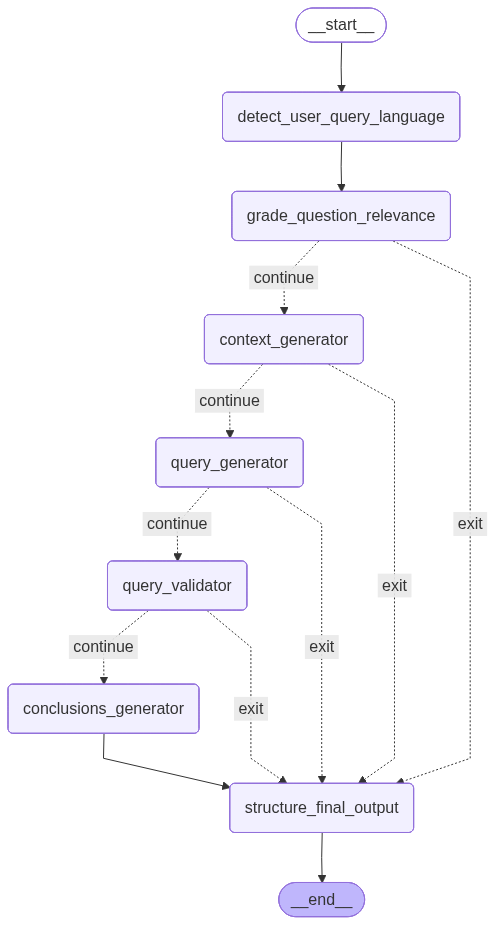

In [3]:
Image(main_graph.get_graph().draw_mermaid_png())

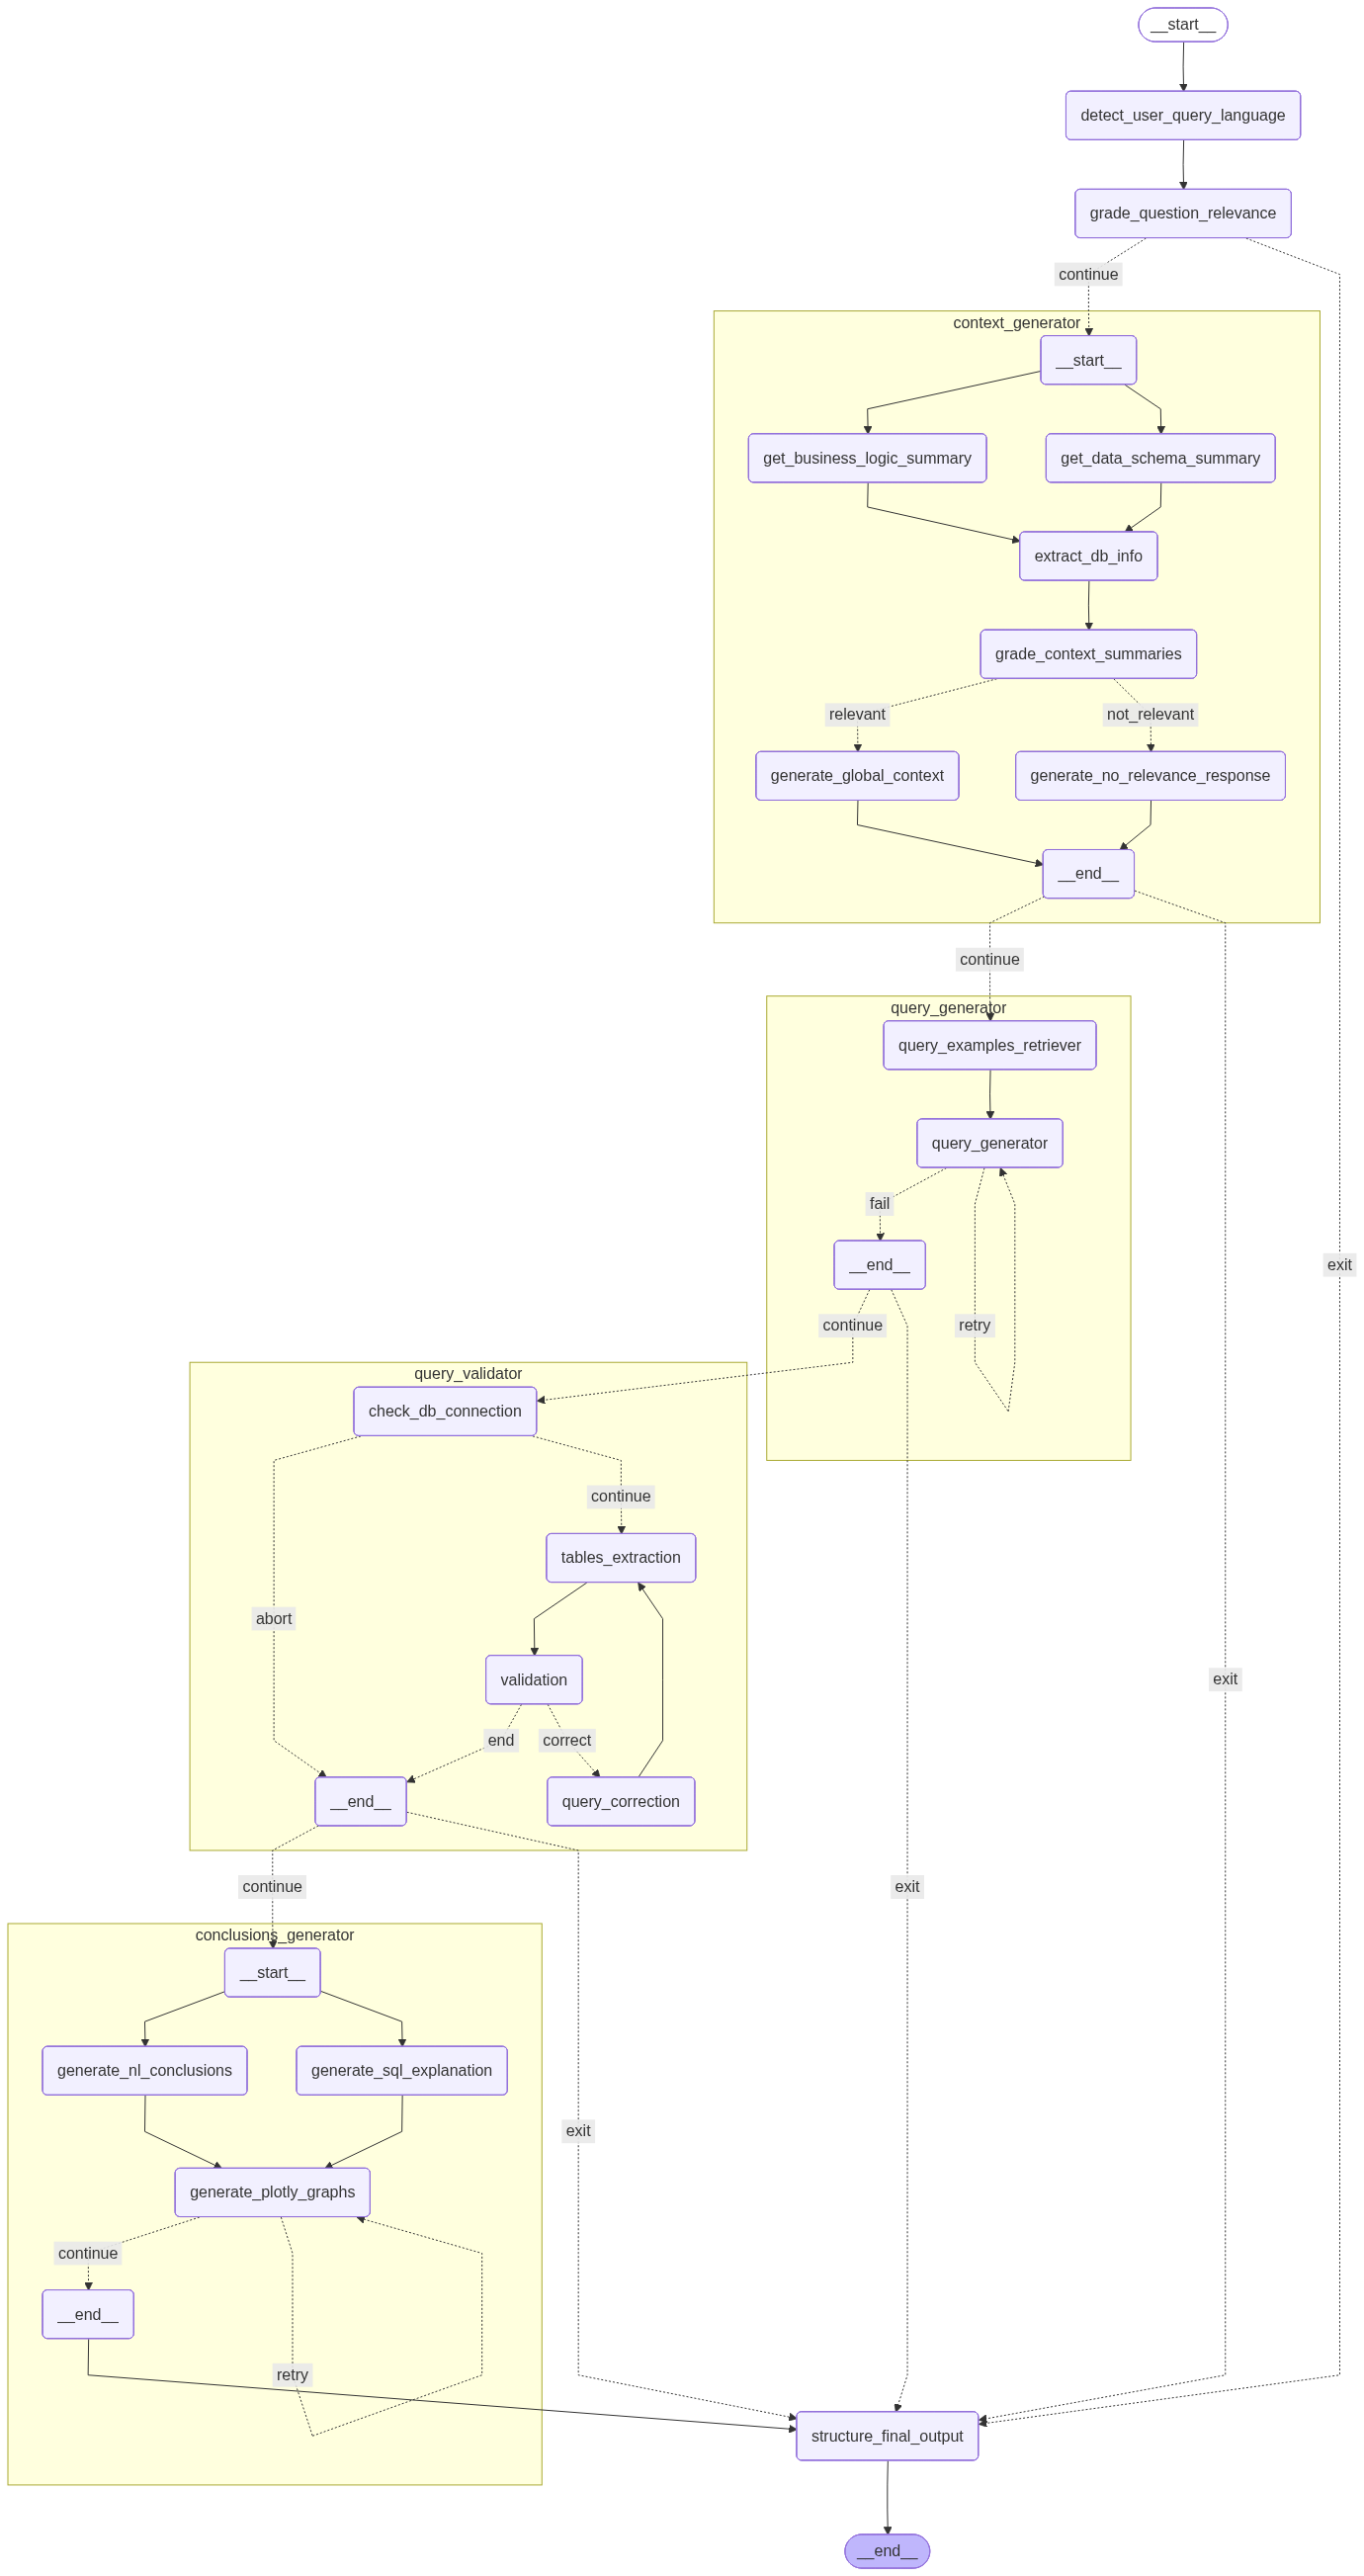

In [4]:
Image(main_graph.get_graph(xray=1).draw_mermaid_png())

### Ejemplo Completo

#### Ejemplo 1

In [5]:
logging.basicConfig(level=logging.WARNING)

result = main_graph.invoke({
    "user_query": "Muéstrame los 10 productos más vendidos para el B2B en el último trimestre, excluyendo los Accesorios. Mes a mes indica cuántas unidades se vendieron, y muestra también a qué categoría y subcategoría pertenecen",
})

result

--- DEFINE USER QUERY LANGUAGE 🔣 ---
--- GRADE BUSINESS RELEVANCE 🏢 ---
--- GENERATING BUSINESS_LOGIC SUB-QUERIES 📚 ---
--- GENERATING MDL SUB-QUERIES 📚 ---
--- MDL RETRIEVE TOOL 🛠️ ---
--- BUSINESS_LOGIC RETRIEVE TOOL 🛠️ ---


--- PARALLELIZE GENERATION 🔢 ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUNK 📝📚 ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUNK 📝📚 ---
--

--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---
--- DECISION: GENERATION IS GROUNDED IN DOCUMENTS ✅ ---
--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---


--- DECISION: GENERATION ADDRESSES QUESTION ✅ ---
--- DECISION: GENERATION IS GROUNDED IN DOCUMENTS ✅ ---
--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---
--- DECISION: GENERATION ADDRESSES QUESTION ✅ ---
--- DECISION: GENERATION IS GROUNDED IN DOCUMENTS ✅ ---
--- DECISION: GENERATION ADDRESSES QUESTION ✅ ---
--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---
--- DECISION: GENERATION IS NOT GROUNDED (HALLUCINATIONS) 👻❌ ---
--- SUMMARIZE CHUNK 📝📚 ---


--- PARALLELIZE GENERATION 🔢 ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUNK 📝📚 ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT K

{'global_execution_ok': True,
 'nl_output': '1. Las prendas dominan las ventas B2B en el último trimestre, con todas las posiciones en el top 10 perteneciendo a esta categoría.  \n2. La subcategoría Camiseta lidera en unidades vendidas, con el producto "Camiseta clásica, P" acumulando 951 unidades.  \n3. Los Jerseys, en sus variantes de manga corta y larga, ocupan tres posiciones en el ranking, sumando un volumen significativo.  \n4. Los pantalones cortos también tienen presencia destacada con dos tallas diferentes en el top 10.  \n5. La distribución mensual muestra una tendencia decreciente en unidades vendidas de mes a mes para todos los productos listados.  \n6. El producto con mayor venta mensual es "Camiseta clásica, P" con 381 unidades en el primer mes.  \n7. La exclusión de accesorios confirma que el foco de compra B2B está en prendas funcionales y básicas.  \n8. La variedad de subcategorías (camiseta, jersey, pantalones cortos, gorra, calcetines, guantes) indica diversidad en l

In [6]:
print(result['sql_query'])

WITH 
  last_quarter AS (
    SELECT
      fs.product_key,
      COALESCE(dp.spanish_product_name, dp.english_product_name) AS product_name,
      dp.spanish_product_category_name,
      dp.spanish_product_subcategory_name,
      EXTRACT(MONTH FROM fs.order_date) AS month_in_quarter,
      fs.order_quantity
    FROM
      sales.fact_sales fs
      JOIN sales.dim_product dp ON fs.product_key = dp.product_key
    WHERE
      fs.sale_source = 'reseller_sales'
      AND dp.spanish_product_category_name <> 'Accesorio'
      AND fs.order_date >= date_trunc('quarter', CURRENT_DATE - interval '3 months')
      AND fs.order_date < date_trunc('quarter', CURRENT_DATE)
  ),
  top_products AS (
    SELECT
      product_key,
      product_name,
      spanish_product_category_name,
      spanish_product_subcategory_name,
      SUM(order_quantity) AS total_qty
    FROM
      last_quarter
    GROUP BY
      product_key, product_name, spanish_product_category_name, spanish_product_subcategory_name
    O

In [7]:
print(result['query_results'])

[{'producto': 'Camiseta clásica, P', 'categoria': 'Prenda', 'subcategoria': 'Camiseta', 'primer_mes': 381, 'segundo_mes': 380, 'tercer_mes': 190, 'total': 951}, {'producto': 'Jersey clásico de manga corta, SG', 'categoria': 'Prenda', 'subcategoria': 'Jersey', 'primer_mes': 329, 'segundo_mes': 299, 'tercer_mes': 183, 'total': 811}, {'producto': "Women's Mountain Shorts, S", 'categoria': 'Prenda', 'subcategoria': 'Pantalones cortos', 'primer_mes': 295, 'segundo_mes': 258, 'tercer_mes': 141, 'total': 694}, {'producto': 'Jersey con logotipo de manga larga, G', 'categoria': 'Prenda', 'subcategoria': 'Jersey', 'primer_mes': 312, 'segundo_mes': 243, 'tercer_mes': 129, 'total': 684}, {'producto': 'AWC Logo Cap', 'categoria': 'Prenda', 'subcategoria': 'Gorra', 'primer_mes': 291, 'segundo_mes': 243, 'tercer_mes': 121, 'total': 655}, {'producto': "Women's Mountain Shorts, L", 'categoria': 'Prenda', 'subcategoria': 'Pantalones cortos', 'primer_mes': 262, 'segundo_mes': 236, 'tercer_mes': 120, 'tot

In [8]:
print(result['nl_output'])

1. Las prendas dominan las ventas B2B en el último trimestre, con todas las posiciones en el top 10 perteneciendo a esta categoría.  
2. La subcategoría Camiseta lidera en unidades vendidas, con el producto "Camiseta clásica, P" acumulando 951 unidades.  
3. Los Jerseys, en sus variantes de manga corta y larga, ocupan tres posiciones en el ranking, sumando un volumen significativo.  
4. Los pantalones cortos también tienen presencia destacada con dos tallas diferentes en el top 10.  
5. La distribución mensual muestra una tendencia decreciente en unidades vendidas de mes a mes para todos los productos listados.  
6. El producto con mayor venta mensual es "Camiseta clásica, P" con 381 unidades en el primer mes.  
7. La exclusión de accesorios confirma que el foco de compra B2B está en prendas funcionales y básicas.  
8. La variedad de subcategorías (camiseta, jersey, pantalones cortos, gorra, calcetines, guantes) indica diversidad en la demanda dentro del segmento prendas.  
9. Ningún p

In [9]:
print(result['sql_explanation'])

## Análisis de la Lógica de la Consulta

La consulta primero identifica las ventas del último trimestre completo, considerando solo las realizadas a través del canal B2B (denominado 'reseller_sales') y excluyendo productos de la categoría "Accesorio". Para ello, une la tabla de ventas con la tabla de productos para obtener el nombre, categoría y subcategoría de cada producto. Luego, calcula la cantidad total vendida por producto en ese periodo y selecciona los 10 productos con mayor volumen de unidades vendidas. Finalmente, para esos 10 productos, desglosa las unidades vendidas mes a mes dentro del trimestre, mostrando también la categoría y subcategoría a la que pertenecen.

## Conclusión y Resultados Clave

El resultado de esta consulta proporciona una lista clara de los 10 productos más vendidos en el canal B2B durante el último trimestre, excluyendo accesorios, con un detalle mensual de las unidades vendidas. Esto permite entender no solo cuáles son los productos líderes en ventas,

In [10]:
create_dashboard_from_json(result['graphics_json'])

#### Ejemplo 2

In [5]:
logging.basicConfig(level=logging.WARNING)

result = main_graph.invoke({
    "user_query": "Quiero saber el total de ventas B2C para el último mes, desglosado por división terrirotial y categoría de productos.",
})

result

--- DEFINE USER QUERY LANGUAGE 🔣 ---
--- GRADE BUSINESS RELEVANCE 🏢 ---
--- GENERATING BUSINESS_LOGIC SUB-QUERIES 📚 ---
--- GENERATING MDL SUB-QUERIES 📚 ---
--- BUSINESS_LOGIC RETRIEVE TOOL 🛠️ ---
--- MDL RETRIEVE TOOL 🛠️ ---


--- PARALLELIZE GENERATION 🔢 ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUNK 📝📚 ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUNK 📝📚 ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUNK 📝📚 ---
--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUNK 📝📚 ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETR

--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---
--- DECISION: GENERATION IS GROUNDED IN DOCUMENTS ✅ ---
--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---
--- DECISION: GENERATION ADDRESSES QUESTION ✅ ---
--- DECISION: GENERATION IS GROUNDED IN DOCUMENTS ✅ ---
--- DECISION: GENERATION ADDRESSES QUESTION ✅ ---


--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---
--- DECISION: GENERATION IS GROUNDED IN DOCUMENTS ✅ ---
--- DECISION: GENERATION ADDRESSES QUESTION ✅ ---


--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---
--- DECISION: GENERATION IS GROUNDED IN DOCUMENTS ✅ ---
--- DECISION: GENERATION ADDRESSES QUESTION ✅ ---
--- CHECK ITERATIONS 🔁 ---
--- GRADE HALLUCINATIONS 👻 ---
--- DECISION: GENERATION IS GROUNDED IN DOCUMENTS ✅ ---
--- DECISION: GENERATION ADDRESSES QUESTION ✅ ---
--- SUMMARIZE BUSINES LOGIC 📝👨‍💼 ---


--- PARALLELIZE GENERATION 🔢 ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUNK 📝📚 ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: RELEVANT CHUNK ✅ ---
--- SUMMARIZE CHUNK 📝📚 ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT 

{'global_execution_ok': True,
 'nl_output': '1. La división territorial con mayores ventas B2C en el último mes es North America.  \n2. La categoría de producto con mayor facturación es Bicicleta en todas las divisiones territoriales.  \n3. North America lidera en ventas de Bicicletas con 544,794.76 unidades monetarias.  \n4. Europe ocupa el segundo lugar en ventas totales de Bicicletas con 500,861.65.  \n5. Pacific presenta el menor volumen de ventas en Bicicletas con 415,836.86.  \n6. En la categoría Accesorio, North America también registra el mayor total con 28,795.51.  \n7. Europe y Pacific tienen ventas de Accesorios significativamente menores, 17,933.25 y 13,008.23 respectivamente.  \n8. Las ventas de Prendas son las más bajas en comparación con las otras categorías en todas las divisiones.  \n9. North America lidera en ventas de Prendas con 16,873.05, seguida por Europe y Pacific con cifras inferiores a 7,000.  \n10. La distribución de ventas muestra una clara concentración en 

In [6]:
print(result['sql_query'])

SELECT
  COALESCE(dst.sales_territory_group, dst.sales_territory_country, dst.sales_territory_region) AS division_territorial,
  COALESCE(dp.spanish_product_category_name, dp.english_product_category_name) AS categoria_producto,
  SUM(COALESCE(fs.sales_amount, 0)) AS total_ventas
FROM
  sales.fact_sales fs
  JOIN sales.dim_sales_territory dst ON fs.sales_territory_key = dst.sales_territory_key
  JOIN sales.dim_product dp ON fs.product_key = dp.product_key
WHERE
  fs.sale_source = 'internet_sales'
  AND fs.order_date >= date_trunc('month', CURRENT_DATE - interval '1 month')
  AND fs.order_date < date_trunc('month', CURRENT_DATE)
GROUP BY
  division_territorial,
  categoria_producto
ORDER BY
  total_ventas DESC


In [7]:
print(result['query_results'])

[{'division_territorial': 'North America', 'categoria_producto': 'Bicicleta', 'total_ventas': Decimal('544794.7600')}, {'division_territorial': 'Europe', 'categoria_producto': 'Bicicleta', 'total_ventas': Decimal('500861.6500')}, {'division_territorial': 'Pacific', 'categoria_producto': 'Bicicleta', 'total_ventas': Decimal('415836.8600')}, {'division_territorial': 'North America', 'categoria_producto': 'Accesorio', 'total_ventas': Decimal('28795.5100')}, {'division_territorial': 'Europe', 'categoria_producto': 'Accesorio', 'total_ventas': Decimal('17933.2500')}, {'division_territorial': 'North America', 'categoria_producto': 'Prenda', 'total_ventas': Decimal('16873.0500')}, {'division_territorial': 'Pacific', 'categoria_producto': 'Accesorio', 'total_ventas': Decimal('13008.2300')}, {'division_territorial': 'Europe', 'categoria_producto': 'Prenda', 'total_ventas': Decimal('6782.0200')}, {'division_territorial': 'Pacific', 'categoria_producto': 'Prenda', 'total_ventas': Decimal('6180.23

In [8]:
print(result['nl_output'])

1. La división territorial con mayores ventas B2C en el último mes es North America.  
2. La categoría de producto con mayor facturación es Bicicleta en todas las divisiones territoriales.  
3. North America lidera en ventas de Bicicletas con 544,794.76 unidades monetarias.  
4. Europe ocupa el segundo lugar en ventas totales de Bicicletas con 500,861.65.  
5. Pacific presenta el menor volumen de ventas en Bicicletas con 415,836.86.  
6. En la categoría Accesorio, North America también registra el mayor total con 28,795.51.  
7. Europe y Pacific tienen ventas de Accesorios significativamente menores, 17,933.25 y 13,008.23 respectivamente.  
8. Las ventas de Prendas son las más bajas en comparación con las otras categorías en todas las divisiones.  
9. North America lidera en ventas de Prendas con 16,873.05, seguida por Europe y Pacific con cifras inferiores a 7,000.  
10. La distribución de ventas muestra una clara concentración en Bicicletas, seguida por Accesorios y finalmente Prenda

In [9]:
print(result['sql_explanation'])

## Análisis de la Lógica de la Consulta

La consulta obtiene el total de ventas realizadas a través de internet (ventas B2C) durante el último mes completo. Para ello, une la tabla de hechos de ventas con las tablas de dimensiones de territorio y producto, lo que permite clasificar las ventas según la división territorial y la categoría del producto. Se utiliza la función COALESCE para seleccionar el nivel más específico disponible de división territorial y para mostrar el nombre de la categoría del producto en español o inglés, según esté disponible. El filtro de fechas asegura que solo se consideren las ventas del mes anterior al mes actual, y finalmente se agrupan los resultados por división territorial y categoría para sumar el total de ventas en cada combinación.

## Conclusión y Resultados Clave

Con esta consulta se obtiene un desglose claro del volumen total de ventas B2C del último mes, segmentado por las diferentes divisiones territoriales y categorías de productos. Esto perm

In [10]:
create_dashboard_from_json(result['graphics_json'])

### Ejemplo No Relevante para Negocio

In [17]:
logging.basicConfig(level=logging.WARNING)

result = main_graph.invoke({
    "user_query": "Give me a python script for web-scrapping",
})

result

--- DEFINE USER QUERY LANGUAGE 🔣 ---
--- GRADE BUSINESS RELEVANCE 🏢 ---
--- 🥁 GENERATE FINAL RESPONSE 🥁 ---
--- ❌ FAIL DETECTED: 'no_relevant_question' ❌ ---


{'global_execution_ok': False,
 'nl_output': "I'm sorry, but your question falls outside the scope of what I can assist with. I am equipped to provide information related to business data, such as sales figures, customer statistics, or inventory. Please let me know if you have any questions in these areas.",
 'sql_query': None,
 'query_results': None,
 'sql_explanation': None,
 'graphics_json': None}

### Ejemplo No Relevante para Contexto

In [18]:
logging.basicConfig(level=logging.WARNING)

result = main_graph.invoke({
    "user_query": "Show me the deparment with the high mid salaries",
})

result

--- DEFINE USER QUERY LANGUAGE 🔣 ---
--- GRADE BUSINESS RELEVANCE 🏢 ---
--- GENERATING BUSINESS_LOGIC SUB-QUERIES 📚 ------ GENERATING MDL SUB-QUERIES 📚 ---

--- MDL RETRIEVE TOOL 🛠️ ---
--- BUSINESS_LOGIC RETRIEVE TOOL 🛠️ ---


--- PARALLELIZE GENERATION 🔢 ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ------ GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---

--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVA

--- PARALLELIZE GENERATION 🔢 ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE CHUNK RELEVANCE TO QUESTION ❔ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️ ---
--- SET RETRIEVAL GRADE OUTPUT KO ❌ ---
--- GRADE: NOT RELEVANT CHUNK 🗑️

{'global_execution_ok': False,
 'nl_output': "I'm sorry, but I cannot provide an answer to your query as it falls outside the scope of the available information. However, I can assist with topics such as analyzing sales data by time periods, calculating average order values, or segmenting customers based on income and lifestyle. Please let me know how I can help!",
 'sql_query': None,
 'query_results': None,
 'sql_explanation': None,
 'graphics_json': None}